Following analysis is done on prediction review score:


1.   Plot the distribution and analysis of the mean difference between predicted and actual ratings for each user and product
2.   Anomaly Detection
3.   Analysis of discrepancy in bias present in review text and review score

Note: When using a different dataset, change data location accordingly at all places





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import csv
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, max_error

In [ ]:
test_data = pd.read_csv('drive/My Drive/ubr/food/6_biased_data.csv')

In [ ]:
user_dict = np.load("drive/My Drive/ubr/food/user_dict.npy",allow_pickle=True).item()
item_dict = np.load("drive/My Drive/ubr/food/item_dict.npy",allow_pickle=True).item()

# Plot the distribution and analysis of the mean difference between predicted and actual ratings for each user and product

In [ ]:
test_data['difference'] =  test_data['Biased_Score'] - test_data['Score']

In [ ]:
test_data

,ProductId,UserId,Summary,Text,Score,Unbiased_Score,Biased_Score,difference
0,B002DHBTHG,A27DYAY3FUWIZ8,b' oatmeal raisin cooki of joy',b' frankli i don t care if food be organ or no...,5.0,4.305485,4.298186,-0.701814
1,7310172101,AE9ZBY7WW3LIQ,b' whi sbould i get crum',b' i select thi compani over the other even th...,1.0,2.721678,2.990295,1.990295
2,B0029O10P4,A2B15SRBD1OEFY,b' my cat love it',b' my cat can t get enough of these treat $ a ...,5.0,5.202271,5.141790,0.141790
3,B000GAT6MM,ANRJ7OJLB3NS1,b' nutiva organ shell hempse lb $ bag',b' i start with oz $ of thi product at first $...,5.0,5.404319,5.100332,0.100332
4,B000WFKGR0,A134S6TOUH24QV,b' my dog love thi',b' thi be one food that when mix with their dr...,5.0,5.065492,5.010736,0.010736
...,...,...,...,...,...,...,...,...
18376,B001HBBQKY,A1W2F15YRW36XF,b' just for puppi',b' my puppi love these treat $ they be soft so...,5.0,4.520520,4.489250,-0.510750
18377,B000CQID2Y,A281NPSIMI1C2R,b' warm holiday memori',b' stash s cinnamon appl chamomil be a comfort...,5.0,4.959982,4.705419,-0.294581
18378,B0014ATRV8,A1O8B2WYDCPTIQ,b' senna leaf',b' i use a high price senna for sever year and...,5.0,5.001121,5.000149,0.000149
18379,B0039556K2,A2F7XE4EB2CRY2,b' real nice coffe',b' just a sweet and enjoy coffe $ almost a des...,5.0,3.936074,3.977043,-1.022957


## Calculation of mean difference value for each user and product

### Product

In [ ]:
item_unique = test_data.ProductId.unique()
print(item_unique.shape)
print(item_unique)

(3978,)
['B002DHBTHG' '7310172101' 'B0029O10P4' ... 'B000EYPNCW' 'B0029NV488'
 'B000EMAZPO']


In [ ]:
#converting to a dataframe
item_diff = pd.DataFrame({'ProductId': item_unique})

In [ ]:
item_d = []
for item in range(len(item_unique)):
  test_item = test_data[test_data['ProductId'] == item_unique[item]]
  val = test_item['difference'].mean()
  item_d.append(val)

In [ ]:
item_diff['difference'] = item_d
item_diff.tail()

,ProductId,difference
3973,B004U7QY5O,2.000845
3974,B002UUJ590,-2.296139
3975,B000EYPNCW,2.545153
3976,B0029NV488,0.200000
3977,B000EMAZPO,0.468341


### User

In [ ]:
user_unique = test_data.UserId.unique()
print(user_unique.shape)
print(user_unique)

(4904,)
['A27DYAY3FUWIZ8' 'AE9ZBY7WW3LIQ' 'A2B15SRBD1OEFY' ... 'A1O1OQ5VS0OCNI'
 'ALPQOXCRF3SSH' 'A1752DLH60KYMK']


In [ ]:
user_diff = pd.DataFrame({'UserId': user_unique}) 

In [ ]:
user_d = []
for user in range(len(user_unique)):
  test_user = test_data[test_data['UserId'] == user_unique[user]]
  val = test_user['difference'].mean()
  user_d.append(val)

In [ ]:
user_diff['difference'] = user_d
user_diff.tail()

,UserId,difference
4899,A1AVPWGPV8ZOGZ,0.400697
4900,A1GWDRBUMQOCRK,-1.585292
4901,A1O1OQ5VS0OCNI,1.200000
4902,ALPQOXCRF3SSH,-0.346940
4903,A1752DLH60KYMK,2.045356


In [ ]:
item_diff.to_csv('drive/My Drive/ubr/food/bias_item_diff_mean.csv', index=False)
user_diff.to_csv('drive/My Drive/ubr/food/bias_user_diff_mean.csv', index=False)

## Frequency distribution of mean difference values



### Product

Text(0.5, 1.0, 'Item biased-score')

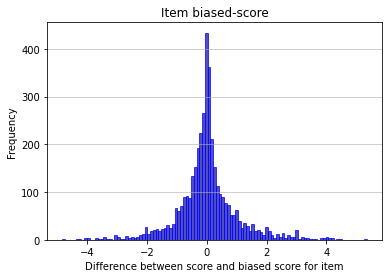

In [ ]:
n, bins, patches = plt.hist(x=item_diff['difference'], bins='auto', color='#0504aa',
                            alpha=0.7, edgecolor='blue')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Difference between score and biased score for item')
plt.ylabel('Frequency')
plt.title('Item biased-score')

### User

Text(0.5, 1.0, 'User score-biased')

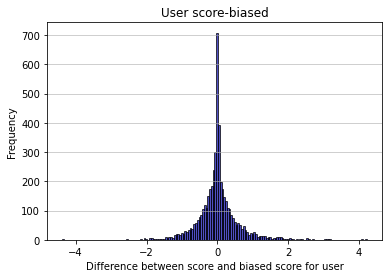

In [ ]:
n, bins, patches = plt.hist(x=user_diff['difference'], bins='auto', color='#0504aa',
                            alpha=0.7, edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Difference between score and biased score for user')
plt.ylabel('Frequency')
plt.title('User score-biased')

## Calculation of the number of users and products with certain average error (difference in predicted and actual review score)

### Error between -0.2 and 0.2

In [ ]:
bias_item_0d2 = item_diff[(item_diff['difference'] >= -0.2) & (item_diff['difference'] <= 0.2)]
bias_item_0d2 = bias_item_0d2.reset_index()
bias_item_0d2

,index,ProductId,difference
0,2,B0029O10P4,0.134593
1,3,B000GAT6MM,0.034969
2,4,B000WFKGR0,0.022412
3,6,B006Q7YG24,-0.180159
4,7,B005VOONLW,-0.001902
...,...,...,...
1352,3955,B0016BS3BK,-0.192222
1353,3956,B003P9XGDG,-0.076923
1354,3957,B001D0GV7M,0.000000
1355,3960,B001VSBWF2,0.175918


In [ ]:
bias_user_0d2 = user_diff[(user_diff['difference'] >= -0.2) & (user_diff['difference'] <= 0.2)]
bias_user_0d2 = bias_user_0d2.reset_index()
bias_user_0d2

,index,UserId,difference
0,2,A2B15SRBD1OEFY,0.123694
1,4,A134S6TOUH24QV,0.009528
2,6,A3N27L13CWJ9HY,0.094448
3,7,A1FATTRIXTSTEB,-0.014624
4,8,A2MSQNPTNAAGL1,-0.168807
...,...,...,...
2361,4889,A3JY5JLQ1ENMHX,-0.087942
2362,4890,A360EFJOE4L7IZ,-0.145420
2363,4892,A2E7CXJAJXLX3D,0.091926
2364,4895,A2YMZM2WJS9C0L,0.175918


### Error between -0.5 and 0.5

In [ ]:
bias_item_0d5 = item_diff[(item_diff['difference'] >= -0.5) & (item_diff['difference'] <= 0.5)]
bias_item_0d5 = bias_item_0d5.reset_index()
bias_item_0d5

,index,ProductId,difference
0,2,B0029O10P4,0.134593
1,3,B000GAT6MM,0.034969
2,4,B000WFKGR0,0.022412
3,5,B000F0DW1E,-0.331037
4,6,B006Q7YG24,-0.180159
...,...,...,...
2319,3968,B001KZ2T12,-0.274762
2320,3970,B003OZX4ME,-0.069718
2321,3972,B000E5ILGQ,-0.380911
2322,3976,B0029NV488,0.200000


In [ ]:
bias_user_0d5 = user_diff[(user_diff['difference'] >= -0.5) & (user_diff['difference'] <= 0.5 )]
bias_user_0d5 = bias_user_0d5.reset_index()
bias_user_0d5

,index,UserId,difference
0,1,AE9ZBY7WW3LIQ,0.444308
1,2,A2B15SRBD1OEFY,0.123694
2,3,ANRJ7OJLB3NS1,0.239591
3,4,A134S6TOUH24QV,0.009528
4,6,A3N27L13CWJ9HY,0.094448
...,...,...,...
3652,4895,A2YMZM2WJS9C0L,0.175918
3653,4896,A23K2W3WLBIA0K,-0.210526
3654,4897,A2OYA2I41LL5Y2,-0.193001
3655,4899,A1AVPWGPV8ZOGZ,0.400697


### Error between -1.0 and 1.0

In [ ]:
bias_item_1 = item_diff[(item_diff['difference'] >= -1.0) & (item_diff['difference'] <= 1.0)]
bias_item_1 = bias_item_1.reset_index()
bias_item_1

,index,ProductId,difference
0,0,B002DHBTHG,-0.701814
1,1,7310172101,0.610247
2,2,B0029O10P4,0.134593
3,3,B000GAT6MM,0.034969
4,4,B000WFKGR0,0.022412
...,...,...,...
3134,3969,B000G7TBZW,-0.703960
3135,3970,B003OZX4ME,-0.069718
3136,3972,B000E5ILGQ,-0.380911
3137,3976,B0029NV488,0.200000


In [ ]:
bias_user_1 = user_diff[(user_diff['difference'] >= -1.0) & (user_diff['difference'] <= 1.0 )]
bias_user_1 = bias_user_1.reset_index()
bias_user_1

,index,UserId,difference
0,1,AE9ZBY7WW3LIQ,0.444308
1,2,A2B15SRBD1OEFY,0.123694
2,3,ANRJ7OJLB3NS1,0.239591
3,4,A134S6TOUH24QV,0.009528
4,5,A3A3248M3OO3UF,0.501301
...,...,...,...
4463,4896,A23K2W3WLBIA0K,-0.210526
4464,4897,A2OYA2I41LL5Y2,-0.193001
4465,4898,A3LG1P8JTSTK6M,-0.922027
4466,4899,A1AVPWGPV8ZOGZ,0.400697


### Error greater than absolute value of 2

In [ ]:
high_bias_item = item_diff[(item_diff['difference'] >= 2) | (item_diff['difference'] <= -2)]
high_bias_item = high_bias_item.reset_index()
high_bias_item

,index,ProductId,difference
0,13,B001535GEG,2.368979
1,58,B000EF3E3G,2.017974
2,170,B001CGTN3G,3.849977
3,243,B003V1O0BU,-2.229605
4,374,B001M19IJK,-2.572015
...,...,...,...
284,3963,B002CJCEQA,2.345986
285,3966,B001EQ4VYU,3.010314
286,3973,B004U7QY5O,2.000845
287,3974,B002UUJ590,-2.296139


In [ ]:
high_bias_user = user_diff[(user_diff['difference'] >= 2) | (user_diff['difference'] <= -2)]
high_bias_user = high_bias_user.reset_index()
high_bias_user

,index,UserId,difference
0,363,A1J52MX2YDWSU0,2.156150
1,481,A2BU2E73JJ3XLH,2.665306
2,562,A21Z0377YERLCH,2.127083
3,566,A3HHLRVCGQW0L7,2.060972
4,595,ABF6W9HQVLQU7,-2.557190
...,...,...,...
74,4829,A2211XUAO701D7,2.064111
75,4846,A3MKIT3HCYPBCA,-2.050000
76,4857,AATWFX0ZZSE6C,3.666667
77,4883,A1K4AIPL0NFAGF,3.101392


# Anomaly detection
### High error (absolute value greater than 2)

In [ ]:
user_item_pair_list_an = []
for i in range(len(high_bias_user)):
  for j in range(len(high_bias_item)):
    if ((test_data['UserId'] == high_bias_user['UserId'][i]) & (test_data['ProductId'] == high_bias_item['ProductId'][j])).any() == True:
      temp = test_data[(test_data['UserId'] == high_bias_user['UserId'][i]) & (test_data['ProductId'] == high_bias_item['ProductId'][j])]
      temp = temp.values.tolist()
      user_item_pair_list_an.append(temp)

In [ ]:
user_item_pair_an_np = np.array(user_item_pair_list_an)
user_item_pair_an_np = user_item_pair_an_np.reshape(len(user_item_pair_list_an),8)
user_item_pair_an = pd.DataFrame(user_item_pair_an_np)
user_item_pair_an.columns = ['ProductId', 'UserId', 'Summary', 'Text', 'Score', 'Unbiased_Score', 'Biased_Score', 'difference']
user_item_pair_an.tail()

,ProductId,UserId,Summary,Text,Score,Unbiased_Score,Biased_Score,difference
32,B0029NICD8,AALWYV9IY0EKZ,b' look good to me but not to my cat appar',b' i buy the whiska choic cut seafood varieti ...,2.0,4.3744408369408365,4.383543771043771,2.3835437710437706
33,B002WDCAJ2,A17BXN9X0G4U3Q,b' strong bitter tast',b' i be use to strong coffe so few coffe work ...,3.0,5.0,5.0,2.0
34,B001EO772A,A2211XUAO701D7,b' weak more like strong tea',b' i wasn t a big fan of thi coffe $ i love th...,3.0,5.229615384615385,5.0641105769230785,2.0641105769230785
35,B002NBUNYM,A3MKIT3HCYPBCA,b' good morn coffe',b' a friend purchas thi and share with me $ th...,4.0,1.85,1.95,-2.05
36,B002RBOB1O,AATWFX0ZZSE6C,b' tasti but waxi',b' i mean they be tasti but after have a cold ...,3.0,7.0,6.666666666666666,3.666666666666666


In [ ]:
user_item_pair_an.to_csv('drive/My Drive/ubr/food/Bias_anomaly_inference.csv', index=False)

# Analysis of discrepancy in bias present in review text and review score
### We picked user and products having very small mean error rate (between -0.02 and 0.02); Noted ambiguous review text with consistent bias in review rating

In [ ]:
bias_item = item_diff[(item_diff['difference'] >= -0.02) & (item_diff['difference'] <= 0.02)]
bias_item = bias_item.reset_index()
bias_item.tail()

,index,ProductId,difference
247,3899,B000E1DSPO,0.004184
248,3915,B0029NWW5W,0.008108
249,3940,B000PDY3HI,0.002521
250,3946,B000FDBRI6,0.019162
251,3957,B001D0GV7M,0.000000


In [ ]:
bias_user = user_diff[(user_diff['difference'] >= -0.02) & (user_diff['difference'] <= 0.02)]
bias_user = bias_user.reset_index()
bias_user.tail()

,index,UserId,difference
615,4867,A263T0EFU3GJA5,0.013218
616,4878,A9RZL4DEXSXGS,-0.006293
617,4879,AH9MUK2Z52V6N,0.017518
618,4886,ATRNPNV3V7VXU,0.000000
619,4887,AI45MQMDG3FLB,0.000000


### Selection of all the tuples whose users and products have mean error less than an absolute value of 0.02

In [ ]:
user_item_pair_list = []
for i in range(len(bias_user)):
  for j in range(len(bias_item)):
    if ((test_data['UserId'] == bias_user['UserId'][i]) & (test_data['ProductId'] == bias_item['ProductId'][j])).any() == True:
      temp = test_data[(test_data['UserId'] == bias_user['UserId'][i]) & (test_data['ProductId'] == bias_item['ProductId'][j])]
      user_item_pair_list.append(temp)

In [ ]:
user_item_pair = pd.concat(user_item_pair_list)
user_item_pair = user_item_pair.reset_index()
user_item_pair = user_item_pair.iloc[:,1:]
user_item_pair

,ProductId,UserId,Summary,Text,Score,Unbiased_Score,Biased_Score,difference
0,B003VIWN1W,A134S6TOUH24QV,b' my dog love thi',b' thi be one food that when mix with their dr...,5.0,5.038092,5.006245,0.006245
1,B001F2AV42,A134S6TOUH24QV,b' my dog love thi',b' thi be one food that when mix with their dr...,5.0,5.063455,5.011537,0.011537
2,B003VIWN1M,A134S6TOUH24QV,b' my dog love thi',b' thi be one food that when mix with their dr...,5.0,5.060637,5.008917,0.008917
3,B005VOONLW,A1FATTRIXTSTEB,b' fresh great tast',b' i be a tea lover and be not realli a coffe ...,5.0,4.975522,4.985376,-0.014624
4,B000CQIDHE,A2MR45IS172241,b' find it again',b' i ve be search store for thi special licori...,5.0,5.019549,5.001189,0.001189
...,...,...,...,...,...,...,...,...
540,B000CQC05K,A3G77L0AQVNRPV,b' veri sooth',b' stash licoric spice tea be so sooth $ i can...,5.0,5.026695,5.002097,0.002097
541,B000CQG89Y,A3AM8NR0L4FFOA,b' the best tea',b' i love red tea by stash $ it be veri diffic...,5.0,5.017926,5.001370,0.001370
542,B001RVFEP2,A3TQ0ZSAD2G98A,b' salt and pepper $',b' popchip be delici $ we buy a varieti pack $...,5.0,5.106810,5.005431,0.005431
543,B00375LB9E,A3C18MRX72K9RV,b' these be great',b' i buy these sprinkl for my cupcak and not o...,5.0,5.000000,5.000000,0.000000


In [ ]:
user_item_pair.to_csv('drive/My Drive/ubr/food/bias_0dec02_inference.csv', index=False)

### Selection of a few tuples where the review text and review summary is ambiguous

In [ ]:
text_discrepancy = user_item_pair.iloc[[33,139,153,214,453], [2,3,4,6]]

In [ ]:
text_discrepancy = text_discrepancy.reset_index()
text_discrepancy

,index,Summary,Text,Score,Biased_Score
0,33,b' disappoint with amazon s polici',b' price drop by in matter of day $ item didn ...,4.0,4.000000
1,139,b' good chip close to expir date',b' these be good chip but they be a month away...,3.0,3.083024
2,153,b' best blue diamond almond',b' i be so delight to get these salt and vineg...,5.0,5.004206
3,214,b' awesom bone',b' my dog beg for these treat everi night afte...,4.0,3.992660
4,453,b' veri strong',b' thi be my first bag of chai tea and i have ...,3.0,2.995954


In [ ]:
text_discrepancy.to_csv('drive/My Drive/ubr/food/rel_review_rating.csv', index=False)